In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cedardataset/signatures/Readme.txt
/kaggle/input/cedardataset/signatures/full_org/original_52_13.png
/kaggle/input/cedardataset/signatures/full_org/original_54_12.png
/kaggle/input/cedardataset/signatures/full_org/original_52_7.png
/kaggle/input/cedardataset/signatures/full_org/original_5_19.png
/kaggle/input/cedardataset/signatures/full_org/original_50_21.png
/kaggle/input/cedardataset/signatures/full_org/original_27_1.png
/kaggle/input/cedardataset/signatures/full_org/original_32_23.png
/kaggle/input/cedardataset/signatures/full_org/original_19_15.png
/kaggle/input/cedardataset/signatures/full_org/original_55_19.png
/kaggle/input/cedardataset/signatures/full_org/original_12_1.png
/kaggle/input/cedardataset/signatures/full_org/original_44_4.png
/kaggle/input/cedardataset/signatures/full_org/original_21_14.png
/kaggle/input/cedardataset/signatures/full_org/original_22_21.png
/kaggle/input/cedardataset/signatures/full_org/original_26_10.png
/kaggle/input/cedardataset/signa

Model Accuracy: 0.9829545454545454

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       264
           1       1.00      0.97      0.98       264

    accuracy                           0.98       528
   macro avg       0.98      0.98      0.98       528
weighted avg       0.98      0.98      0.98       528



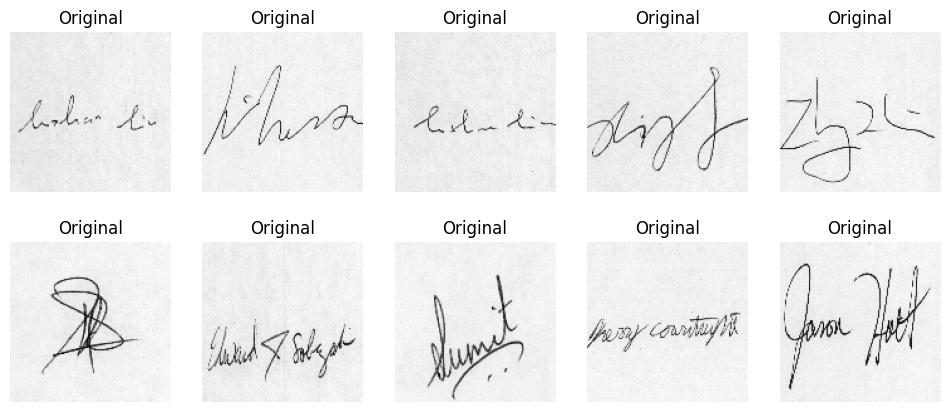

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


original_signatures_path = "/kaggle/input/cedardataset/signatures/full_org/"
forged_signatures_path = "/kaggle/input/cedardataset/signatures/full_forg/"


def load_images(folder_path, label, image_size=(128, 128)):
    """
    Reads all images from a folder, converts them to grayscale, resizes them, 
    and assigns a label (0 for original, 1 for forged).
    """
    images = []
    labels = []

    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        
        if img is not None: 
            img = cv2.resize(img, image_size) 
            images.append(img)
            labels.append(label) 

    return images, labels  


original_images, original_labels = load_images(original_signatures_path, label=0)
forged_images, forged_labels = load_images(forged_signatures_path, label=1)


X = np.array(original_images + forged_images) 
y = np.array(original_labels + forged_labels)  

# Function to extract HOG (Histogram of Oriented Gradients) features from images
def extract_hog_features(images):
    """
    Extracts HOG features from each image.
    HOG helps in capturing important edge and texture information.
    """
    feature_list = []

    for img in images:
        hog_features = hog(
            img, 
            pixels_per_cell=(8, 8), 
            cells_per_block=(2, 2), 
            feature_vector=True
        )
        feature_list.append(hog_features)

    return np.array(feature_list)

# Apply HOG feature extraction
X_features = extract_hog_features(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y
)


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict labels for test data
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred) 
report = classification_report(y_test, y_pred) 

# Print results
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Display some sample images with their labels
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i], cmap='gray')  
    ax.set_title("Forged" if y[i] == 1 else "Original")  
    ax.axis('off')

plt.show() 

In [3]:
output_text = f"""
Model Accuracy: {accuracy:.6f}

Classification Report:
{report}
"""

output_file = "/kaggle/working/model_output.txt"

with open(output_file, "w") as f:
    f.write(output_text)

print(f"Results saved to {output_file}")


Results saved to /kaggle/working/model_output.txt
